In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Sets/drug200 (1).csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [8]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [9]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [10]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

## Applying Label and Ordinal Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for 'Color' column
label_encoder = LabelEncoder()
# Columns to Encode
columns_to_encode = ['Sex', 'Cholesterol', 'Drug']

# Apply Label Encoding to Multiple Columns
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

print("\nDataFrame with Label Encoded Columns:\n", df)
# # df['df_encoded'] = label_encoder.fit_transform(df['Sex','Cholesterol','Drug'])
# df['df_encoded'] = label_encoder.fit_transform(df['Sex', 'Cholesterol', 'Drug'])

# print("\nDataFrame with Label Encoded 'Color':\n", df)


DataFrame with Label Encoded Columns:
      Age Sex      BP Cholesterol  Na_to_K   Drug  Sex_encoded  \
0     23   F    HIGH        HIGH   25.355  drugY            0   
1     47   M     LOW        HIGH   13.093  drugC            1   
2     47   M     LOW        HIGH   10.114  drugC            1   
3     28   F  NORMAL        HIGH    7.798  drugX            0   
4     61   F     LOW        HIGH   18.043  drugY            0   
..   ...  ..     ...         ...      ...    ...          ...   
195   56   F     LOW        HIGH   11.567  drugC            0   
196   16   M     LOW        HIGH   12.006  drugC            1   
197   52   M  NORMAL        HIGH    9.894  drugX            1   
198   23   M  NORMAL      NORMAL   14.020  drugX            1   
199   40   F     LOW      NORMAL   11.349  drugX            0   

     Cholesterol_encoded  Drug_encoded  
0                      0             4  
1                      0             2  
2                      0             2  
3              

In [12]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal Encoding for 'Size' column
bp_order = ['LOW', 'NORMAL','HIGH']  # Define the order
encoder = OrdinalEncoder(categories=[bp_order])
df['BP_encoded'] = encoder.fit_transform(df[['BP']])

print("\nDataFrame with Ordinal Encoded 'Size':\n", df)


DataFrame with Ordinal Encoded 'Size':
      Age Sex      BP Cholesterol  Na_to_K   Drug  Sex_encoded  \
0     23   F    HIGH        HIGH   25.355  drugY            0   
1     47   M     LOW        HIGH   13.093  drugC            1   
2     47   M     LOW        HIGH   10.114  drugC            1   
3     28   F  NORMAL        HIGH    7.798  drugX            0   
4     61   F     LOW        HIGH   18.043  drugY            0   
..   ...  ..     ...         ...      ...    ...          ...   
195   56   F     LOW        HIGH   11.567  drugC            0   
196   16   M     LOW        HIGH   12.006  drugC            1   
197   52   M  NORMAL        HIGH    9.894  drugX            1   
198   23   M  NORMAL      NORMAL   14.020  drugX            1   
199   40   F     LOW      NORMAL   11.349  drugX            0   

     Cholesterol_encoded  Drug_encoded  BP_encoded  
0                      0             4         2.0  
1                      0             2         0.0  
2                  

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_encoded,Cholesterol_encoded,Drug_encoded,BP_encoded
0,23,F,HIGH,HIGH,25.355,drugY,0,0,4,2.0
1,47,M,LOW,HIGH,13.093,drugC,1,0,2,0.0
2,47,M,LOW,HIGH,10.114,drugC,1,0,2,0.0
3,28,F,NORMAL,HIGH,7.798,drugX,0,0,3,1.0
4,61,F,LOW,HIGH,18.043,drugY,0,0,4,0.0


In [14]:
df.drop(columns=['Sex','BP','Cholesterol','Drug'],axis=1,inplace=True)

In [15]:
df.head()

,Age,Na_to_K,Sex_encoded,Cholesterol_encoded,Drug_encoded,BP_encoded
0,23,25.355,0,0,4,2.0
1,47,13.093,1,0,2,0.0
2,47,10.114,1,0,2,0.0
3,28,7.798,0,0,3,1.0
4,61,18.043,0,0,4,0.0


In [16]:
X = df.drop(columns=['Drug_encoded'])
y = df['Drug_encoded']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Applying the Model

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [19]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Generate confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)

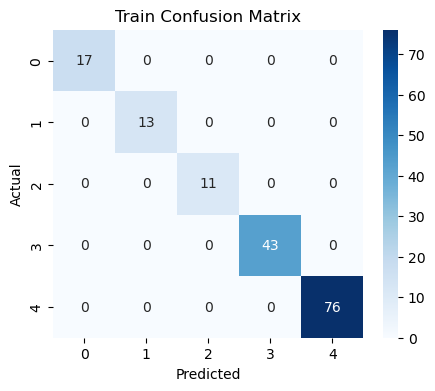

In [20]:
# Visualize the train confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Train Confusion Matrix')
plt.show()

In [21]:
cm = confusion_matrix(y_test,y_pred)

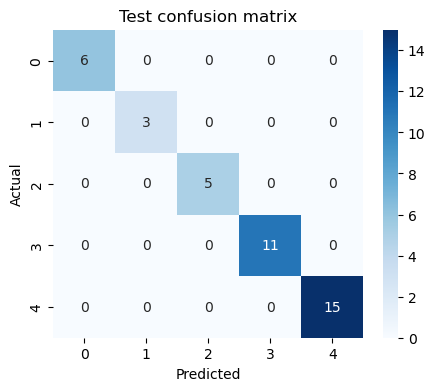

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test confusion matrix')
plt.show()